In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

In [ ]:
path = "/content/Tesla.csv"
stockdt = pd.read_csv(path, index_col = 'Date', parse_dates = True)

In [ ]:
stockdt['Close'][:6]

Date
2010-06-29    23.889999
2010-06-30    23.830000
2010-07-01    21.959999
2010-07-02    19.200001
2010-07-06    16.110001
2010-07-07    15.800000
Name: Close, dtype: float64

In [ ]:
stockdt.shape

(1692, 6)

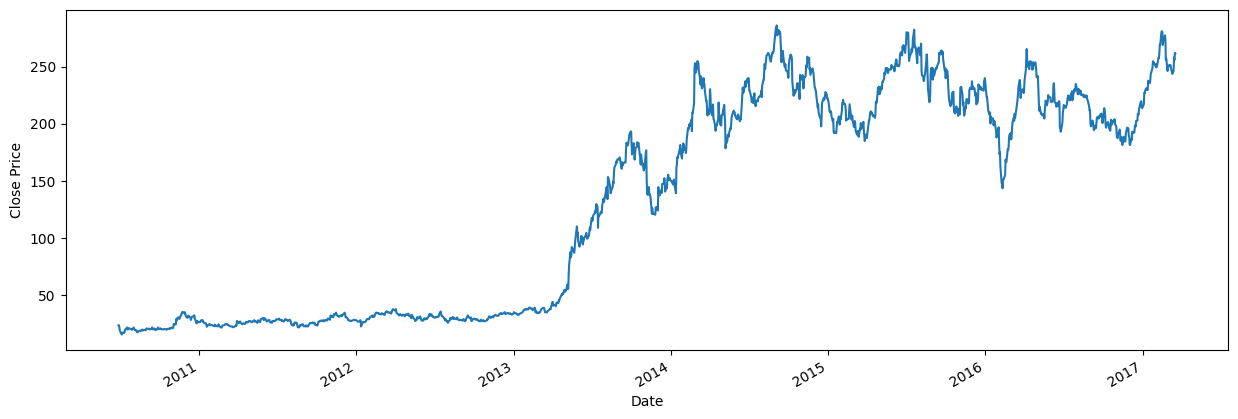

In [ ]:
plt.figure(figsize=(15,5))
stockdt['Close'].plot()
plt.ylabel('Close Price')
plt.show()

# Smooth data

In [ ]:
alpha = 0.045

In [ ]:
stockdt['Smooth'] = pd.Series(np.array([0 for i in range(stockdt.shape[0])]))
stockdt['Smooth'][0] = stockdt['Close'][0]

<ipython-input-22-ccca33800462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][0] = stockdt['Close'][0]


In [ ]:
stockdt['Smooth']

Date
2010-06-29    23.889999
2010-06-30          NaN
2010-07-01          NaN
2010-07-02          NaN
2010-07-06          NaN
                ...    
2017-03-13          NaN
2017-03-14          NaN
2017-03-15          NaN
2017-03-16          NaN
2017-03-17          NaN
Name: Smooth, Length: 1692, dtype: float64

In [ ]:
for i in range(1, stockdt.shape[0]):
    stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]

<ipython-input-24-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]
<ipython-input-24-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]
<ipython-input-24-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][i] = a

In [ ]:
stockdt['Smooth'][:6]

Date
2010-06-29    23.889999
2010-06-30    23.889999
2010-07-01    23.887299
2010-07-02    23.800571
2010-07-06    23.593545
2010-07-07    23.256785
Name: Smooth, dtype: float64

<ipython-input-24-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]
<ipython-input-24-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]
<ipython-input-24-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][i] = a

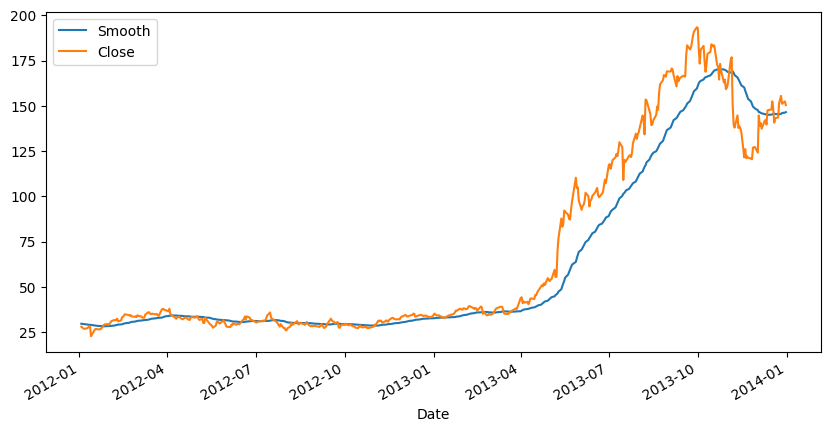

In [ ]:
plt.figure(figsize=(10,5))
stockdt.loc["2012-01-01":"2014-01-01", ['Smooth']].plot(ax=plt.gca())
stockdt.loc["2012-01-01":"2014-01-01", ['Close']].plot(ax=plt.gca())
plt.show()

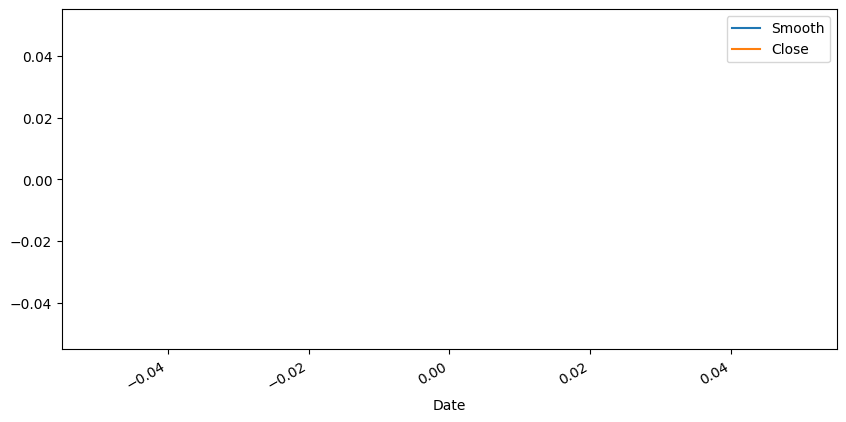

In [ ]:
plt.figure(figsize=(10,5))
stockdt.loc["2021-10-16":"2022-06-16", ['Smooth']].plot(ax=plt.gca())
stockdt.loc["2021-10-16":"2022-06-16", ['Close']].plot(ax=plt.gca())
plt.show()

In [ ]:
stockdt

,Open,High,Low,Close,Volume,Adj Close,Smooth
Date,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000,23.889999
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999,23.887299
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001,23.800571
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001,23.593545
...,...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,247.920598
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,247.841821
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,248.298939


# Technical Indicators


RELATIVE STRENGTH INDEX (RSI)

It evaluates the conditions of overbought and oversold in the stock prices by measuring the extent of recent changes in prices. The RSI compares stock’s average gains and losses over a specific period of time, typically 14 trading days. RSI ranges between 0 and 100, and traditionally, RSI above 70 indicates that the stock is overbought, while RSI below 30 indicates that the stock is oversold.
In this paper, we use a 27-day time-frame to calculate the initial value of the RSI. The formula for calculating RSI is:


$RSI = 100 - \dfrac{100}{1+RS}$


$RS = \dfrac{Average gain over 27 days}{Average loss over 27 days}$

RSI stands for relative strength index, and RS stands for relative strength.


In [ ]:
def RSI(series):
    delta = series.diff()
    up = delta.clip(lower = 0)
    down = -1.0*delta.clip(upper = 0)

    ema_up = up.ewm(com = 26, adjust = False).mean()
    ema_down = down.ewm(com = 26, adjust = False).mean()

    rs = ema_up / ema_down
    rsi = 100 - (100 / (1+rs))
    return rsi

In [ ]:
stockdt['RSI'] = RSI(stockdt['Smooth'])

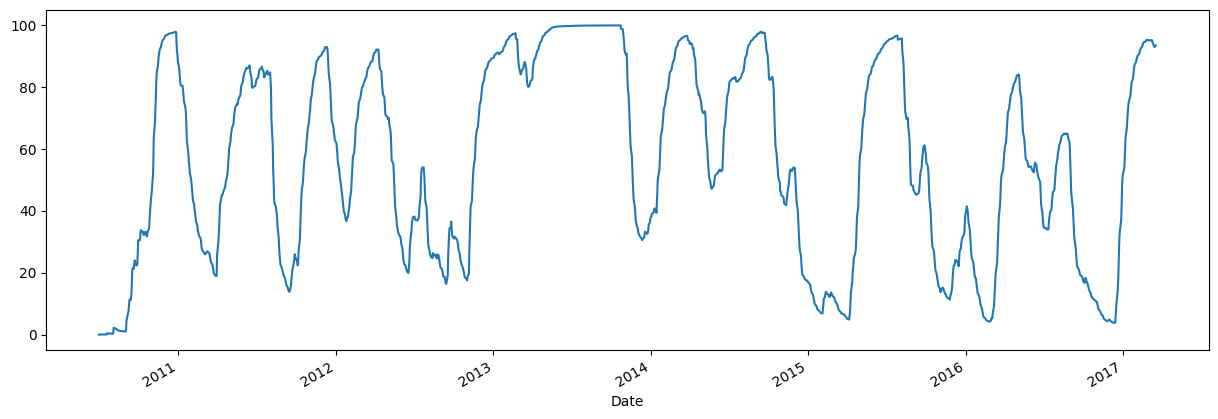

In [ ]:
plt.figure(figsize=(15,5))
stockdt['RSI'].plot()
plt.show()

MOVING AVERAGE CONVERGENCE DIVERGENCE (MACD)

The moving average convergence divergence (MACD) is defined to be a trend-following momentum indicator that helps investors understand whether the bearish or bullish movement in prices is becoming stronger or weaker.

It is computed by subtracting the 26-day exponential moving average which is the longer moving average from the 12-day exponential moving average of a security’s prices which is defined to be the shorter one. The line obtained from this calculation called the MACD line and the 9-day exponential moving average of the MACD line called the signal line which can work as an incitement for buy and sell signals. However, MACD indicates a buy signal whenever it is above the signal line and a sell signal whenever it is below the signal line.

The formula for calculating MACD is as follows:


$MACD = EMA_{12}(C) - EMA_{26}(C)$

$SL = EMA_9(MACD)$

MACD stands for moving average convergence divergence or MACD line and SL stands for the signal line.

$EMA_n$= n-day exponential moving average

C = closing price

In [ ]:
def MACD(series):
    ema_12 = series.ewm(span = 12).mean()
    ema_26 = series.ewm(span = 26).mean()
    macd = ema_12 - ema_26
    signal = macd.ewm(span = 9).mean()
    return macd, signal

In [ ]:
stockdt['MACD'] = MACD(stockdt['Smooth'])[0] - MACD(stockdt['Smooth'])[1]

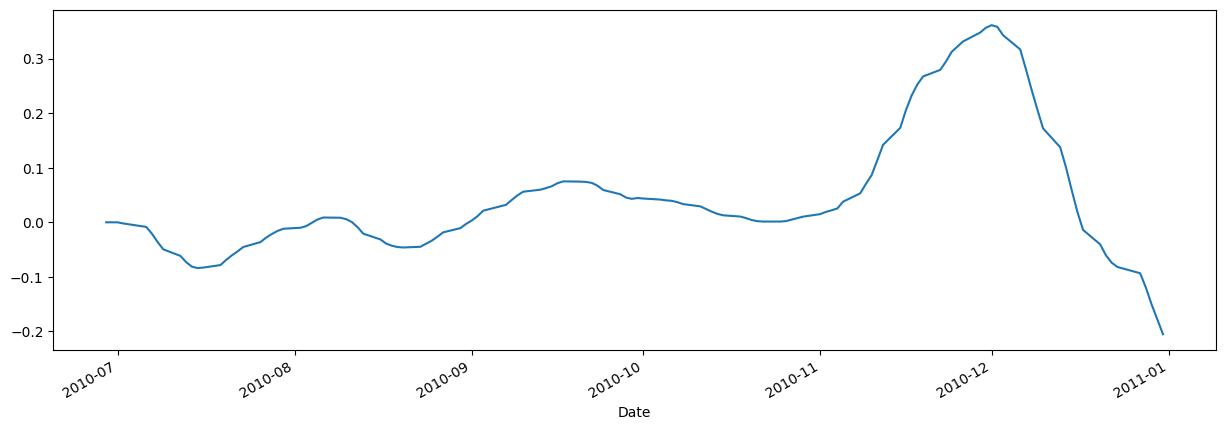

In [ ]:
plt.figure(figsize=(15,5))
stockdt.loc['2010-01-01':'2011-01-01', 'MACD'].plot(ax=plt.gca())
plt.show()

PRICE RATE OF CHANGE (ROC)

The price rate of change (ROC) is another momentum oscillator that compares and cal- culates the percent change in price between the current price and the price n-periods ago. In other words, ROC measures the changes between the current price with respect to the earlier closing price in n days ago. It moves from positive to negative, and fluctu- ates above and below the zero-line. However, this oscillator can be used for determining the overbought and oversold conditions, divergences and also zero-line crossovers.
We use a 21-day time-frame to calculate the initial value of the ROC. The formula for calculating ROC is as follows:

$ROC = \dfrac{C_t - C_{t-21}}{C_{t-21}} .100$

where,

ROC stands for price rate of change at time t;

Ct = closing price at time t;

Ct−21 = closing price 21 periods ago

In [ ]:
def ROC(series):
    return (series - series.shift(21))*100/series.shift(21)

In [ ]:
stockdt['ROC'] = ROC(stockdt['Smooth'])

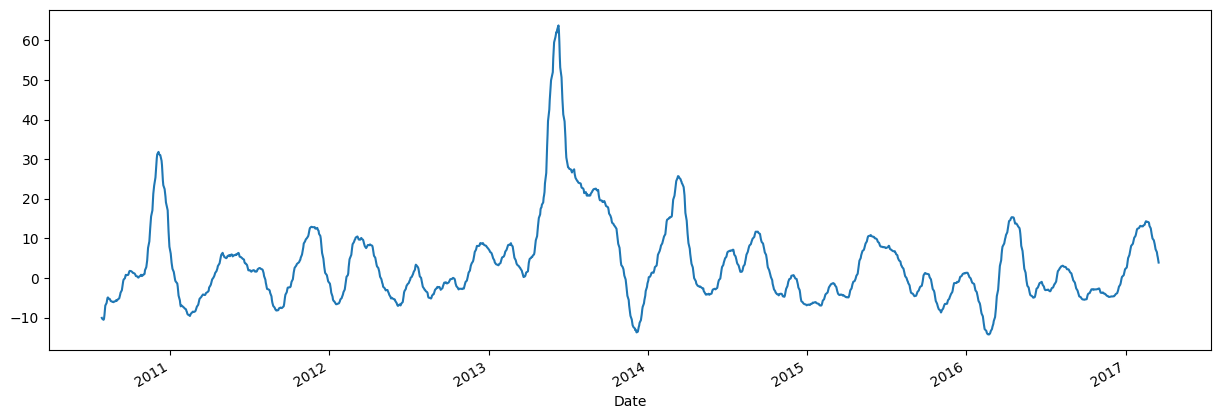

In [ ]:
plt.figure(figsize=(15,5))
stockdt['ROC'].plot()
plt.show()

STOCHASTIC OSCILLATOR (%K)

The stochastic oscillator which is often denoted by the symbol (%K), is a momentum oscillator that was developed by George Lane. The stochastic oscillator identifies the location of the stock’s closing price relative to the high and low range of the stock’s price over a period of time, typically being 14 trading days. The stochastic oscillator varies from 0 to 100, a reading above 80 generally represents overbought while below 20 represents oversold. We use a 14-day time-frame %K. The formula for calculating the stochastic oscillator is given below:

$\% K = \dfrac{C_t - L_{14}}{H_{14} - L_{14}} \times 100$

where,

Ct = the current closing price.

L14 = lowest low over the past 14 days H14 = highest high in the last 14 days

In [ ]:
def STO_OS(low, high, smooth):
    low_14 = low.rolling(14).min()
    high_14 = high.rolling(14).max()
    return (smooth - low_14)*100/(high_14 - low_14)

In [ ]:
stockdt['%K'] = STO_OS(stockdt['Low'], stockdt['High'], stockdt['Smooth'])

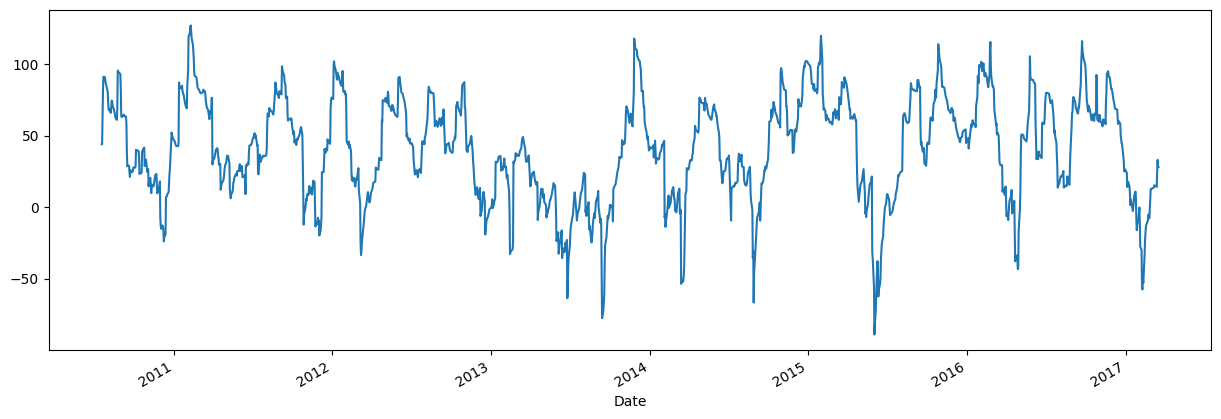

In [ ]:
plt.figure(figsize=(15,5))
stockdt['%K'].plot()
plt.show()

WILLIAMS PERCENTAGE RANGE (WILLIAM %R)

Williams percentage range which is also called Williams %R is a common indicator developed by Larry Williams. This indicator is often denoted by the symbol (%R), it measures the overbought and oversold levels and it works inversely to %K. Whilst %K ranges between 0 and 100, %R ranges between 0 and -100. A Williams %R below -80 indicates a buy signal, whereas a Williams %R above -20 indicates a sell signal.
We use also a 14-day time frame %R, the formula used to calculate the Williams %R is:

$\% R = \dfrac{H_{14} - C_t}{H_{14} - L_{14}} \times -100$

where,

Ct = the current closing price

L14 = lowest low over the past 14 days H14 = highest high in the last 14 days


In [ ]:
def WILLIAM(low, high, smooth):
    low_14 = low.rolling(14).min()
    high_14 = high.rolling(14).max()
    return (high_14 - smooth)*-100/(high_14 - low_14)

In [ ]:
stockdt['%R'] = WILLIAM(stockdt['Low'], stockdt['High'], stockdt['Smooth'])

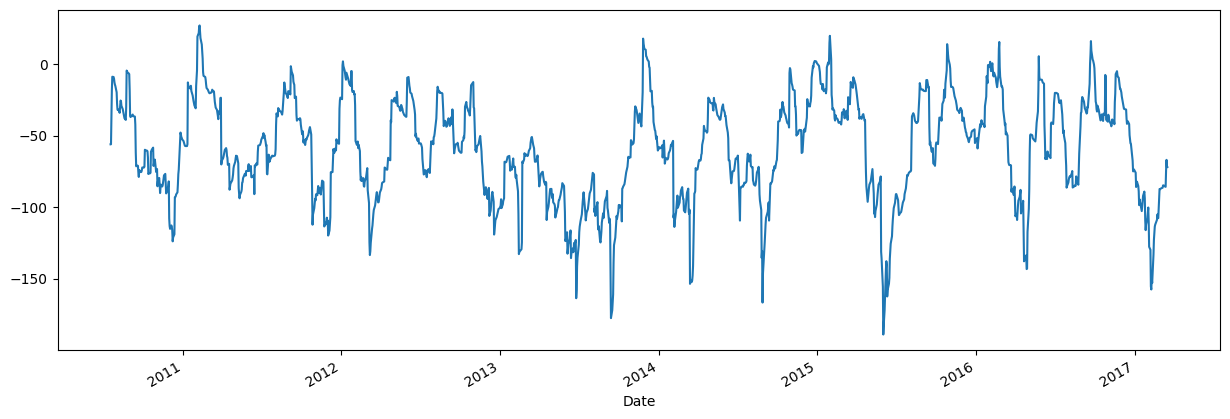

In [ ]:
plt.figure(figsize=(15,5))
stockdt['%R'].plot()
plt.show()

COMMODITY CHANNEL INDEX (CCI)

The Commodity Channel Index (CCI) was developed by Donald Lambert, it is a useful oscillator that is used to estimate the direction and the strength of the stock price trend. This indicator is also used to determine when stock prices reach the condition of either overbought and oversold. The CCI is calculated by first determining the difference between the mean price of a stock and the average of the means, then comparing this difference to the average difference over a period of time, typically 20 days. The CCI is often scaled by an inverse factor of 0.015. The formula used to calculate the CCI is:

$CCI = \dfrac{TypicalPrice - MA_{20}}{0.015 \times D}$

where,
Typical price = average of low, high and close prices: $\sum_{i = 1}^{20}(H+L+C)/3$
    
MA20 = simple moving average over 20 days

D = mean deviation

In [ ]:
def CCI(high, low, smooth):
    typical_price = (high + low + smooth) / 3
    rolling_mean = typical_price.rolling(window=20).mean()
    rolling_std = typical_price.rolling(window=20).std()
    return (typical_price - rolling_mean) / (0.015 * rolling_std)


In [ ]:
stockdt['CCI'] = CCI(stockdt['High'], stockdt['Low'], stockdt['Smooth'])

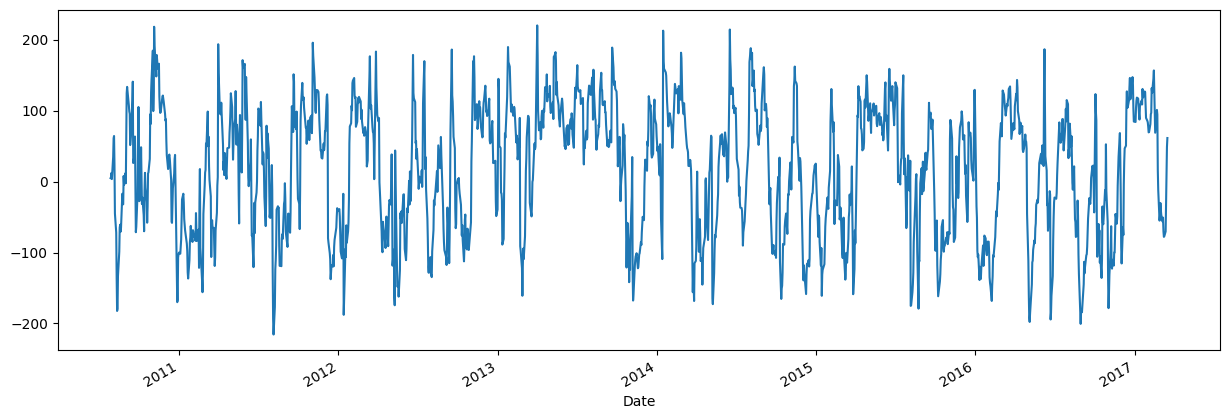

In [ ]:
plt.figure(figsize=(15,5))
stockdt['CCI'].plot()
plt.show()

DISPARITY INDEX (DIX)

The Disparity Index (DIX) is another useful indicator that is used commonly in technical analysis. This indicator was developed by Steve Nison and it is a momentum indicator that compares the stock’s current price with its moving average (MA) over a particular time period. DIX below 0 indicates that the stock’s current price is below the n-day MA, DIX above 0 indicates that the stock’s current price is above the n-day MA, whereas in the case the DIX equals 0 indicates that the stock’s current price is equal to the n-day MA. 14-day MA is used in this paper. The formula for calculating the DIX with 14-day MA is as follows:


$DIX = \dfrac{C_t - MA_{14}}{MA_{14} \times 100}$

where,

Ct = current stock price.

MA14 = moving average over 14 days

In [ ]:
def DIX(smooth):
    ma_14 = smooth.rolling(window=14).mean()
    return (smooth - ma_14)/(ma_14)

In [ ]:
stockdt['DIX'] = DIX(stockdt['Smooth'])

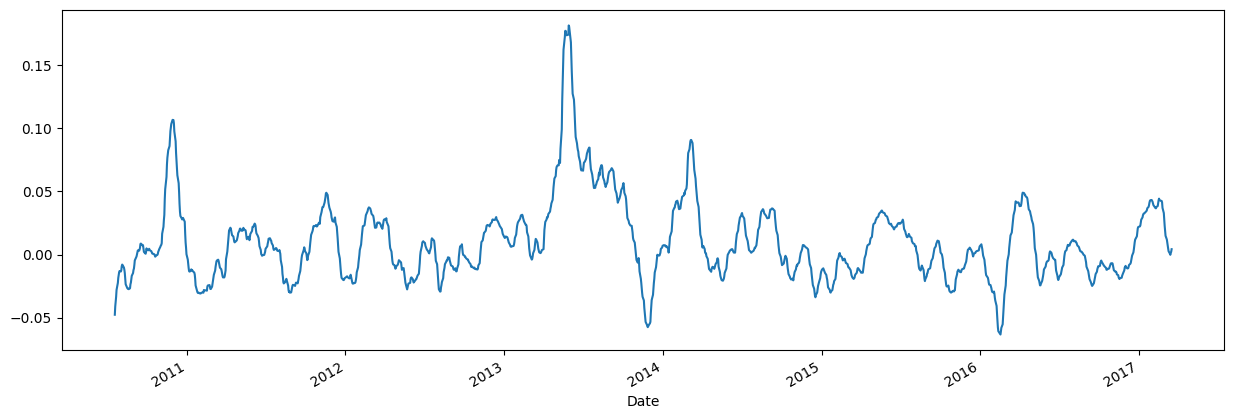

In [ ]:
plt.figure(figsize=(15,5))
stockdt['DIX'].plot()
plt.show()

# DATA LABELLING

In [ ]:
stockdt['Target_30_smooth'] = np.sign(stockdt['Smooth'].shift(-30) - stockdt['Smooth'])

In [ ]:
stockdt.dropna(axis=0, inplace = True)

In [ ]:
stockdt[100:150]

,Open,High,Low,Close,Volume,Adj Close,Smooth,RSI,MACD,ROC,%K,%R,CCI,DIX,Target_30_smooth
Date,,,,,,,,,,,,,,,
2010-12-20,31.639999,32.189999,31.260000,31.700001,523400,31.700001,28.661927,97.616761,-0.040423,22.464365,10.414862,-89.585138,11.446722,0.028644,-1.0
2010-12-21,31.799999,32.689999,31.709999,32.259998,777700,32.259998,28.798640,97.688649,-0.060393,21.532962,15.881351,-84.118649,31.995301,0.027806,-1.0
2010-12-22,32.250000,32.860001,31.700001,32.630001,833300,32.630001,28.954401,97.768295,-0.073866,20.520915,23.147321,-76.852679,37.638360,0.028153,-1.0
2010-12-23,31.260000,32.480000,29.920000,30.090000,1552600,30.090000,29.119803,97.849993,-0.081778,19.117513,26.352787,-73.647213,-4.274805,0.029037,-1.0
2010-12-27,28.020000,28.580000,25.059999,25.549999,9301900,25.549999,29.163462,97.871353,-0.093371,17.113640,52.206917,-47.793083,-170.008734,0.026016,-1.0
2010-12-28,25.850000,26.750000,25.000000,26.410000,4056300,26.410000,29.000856,94.249803,-0.119614,14.278208,50.515875,-49.484125,-167.088275,0.016542,-1.0
2010-12-29,27.030001,28.010000,26.500000,27.730000,3319200,27.730000,28.884268,91.722683,-0.150454,11.846874,49.043797,-50.956203,-107.056350,0.009496,-1.0
2010-12-30,27.700001,27.900000,26.379999,26.500000,2041100,26.500000,28.832326,90.598800,-0.178091,10.015279,48.387963,-51.612037,-102.381815,0.005397,-1.0
2010-12-31,26.570000,27.250000,26.500000,26.629999,1417900,26.629999,28.727371,88.327810,-0.205248,7.924301,47.422017,-52.577983,-100.105548,0.000195,-1.0


# CORRELATION AMONG FEATURES AND TARGET

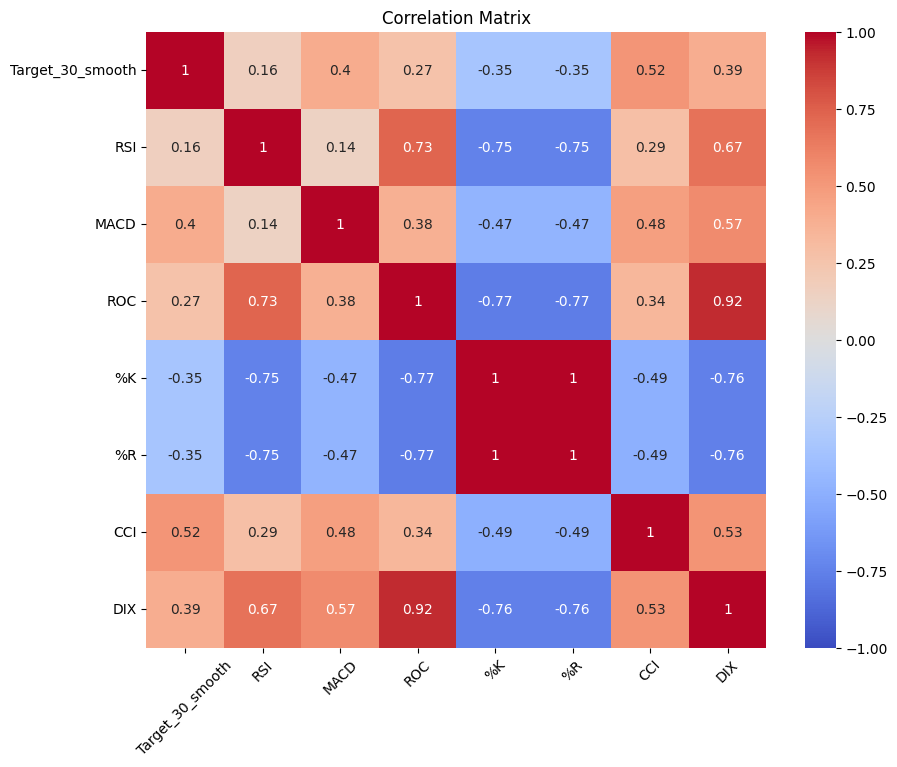

In [ ]:
# Calculate the correlation matrix
correlation_matrix = stockdt[['Target_30_smooth', 'RSI', 'MACD', 'ROC', '%K', '%R', 'CCI', 'DIX']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
stockdt = stockdt.drop('ROC', axis = 1)

In [ ]:
stockdt = stockdt.drop('%K', axis = 1)

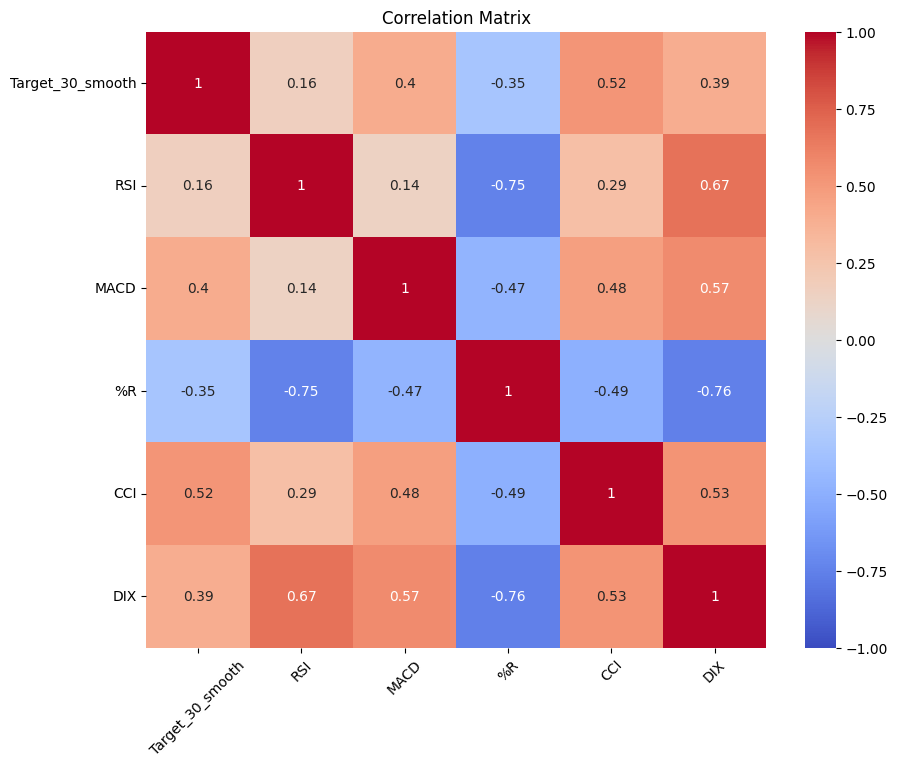

In [ ]:
# Calculate the correlation matrix
correlation_matrix_ = stockdt[['Target_30_smooth', 'RSI', 'MACD', '%R', 'CCI', 'DIX']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
stockdt.loc[:, 'RSI':]

,RSI,MACD,%R,CCI,DIX,Target_30_smooth
Date,,,,,,
2010-07-29,0.315384,-0.015826,-14.231289,12.223667,-0.013920,-1.0
2010-07-30,0.304745,-0.011840,-15.189012,3.608563,-0.013034,-1.0
2010-08-02,0.291323,-0.010008,-19.598988,34.908338,-0.013458,-1.0
2010-08-03,0.287373,-0.007021,-27.699840,61.194369,-0.012232,-1.0
2010-08-04,2.125575,-0.000827,-31.753954,64.303569,-0.009219,-1.0
...,...,...,...,...,...,...
2017-01-27,87.304250,1.221136,-112.068352,89.826752,0.043060,1.0
2017-01-30,88.076113,1.209269,-107.779382,85.766365,0.043233,1.0
2017-01-31,88.704379,1.175193,-104.000932,83.611443,0.042608,1.0


# TRAIN TEST SPLIT CASE PREDICTING

In [ ]:
X = stockdt.loc[:, 'RSI':'DIX']
y = stockdt.loc[:, 'Target_30_smooth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

PROPORTION OF UP AND DOWN DAYS IN TRAINING SET

In [ ]:
value_counts = pd.Series(y_train).value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_train)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_train)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.5548780487804879
Proportion of -1s: 0.4451219512195122


PROPORTION OF UP AND DOWN DAYS IN TESTING SET

In [ ]:
value_counts = pd.Series(y_test).value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_test)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_test)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.5379939209726444
Proportion of -1s: 0.46200607902735563


In [ ]:
grid_rf = {
'n_estimators': [75, 100, 150, 200],
'max_depth': [2, 5, 7, 9, None],
'max_features': [2, 3, 4]
}

cv = KFold(n_splits=4, shuffle=False)
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
gscv_fit = gscv.fit(X_train, y_train)
best_parameters = gscv_fit.best_params_
print("Hyperparameter: ", best_parameters)

model = RandomForestClassifier(**best_parameters, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Hyperparameter:  {'max_depth': None, 'max_features': 2, 'n_estimators': 200}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
print("TARGET 30 DAYS")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

TARGET 30 DAYS
Accuracy: 0.8601823708206687
Precision: 0.8634949540936339
Recall: 0.8561180493606899
F1 Score: 0.8581896551724137
Confusion Matrix:
[[122  30]
 [ 16 161]]


# 2 UNSHUFFLED TRAINING SET AND TEST SET CASE

In [ ]:
# ^GSPC AAPL IBM
x_train = stockdt.loc['2000-01-01':'2019-05-31', 'RSI':'DIX']
y_train = stockdt.loc['2000-01-01':'2019-05-31', 'Target_30_smooth']

PROPORTION OF UP AND DOWN DAYS IN TRAINING SET

In [ ]:
value_counts = y_train.value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_train)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_train)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.5514929920780012
Proportion of -1s: 0.44850700792199877


In [ ]:
x_train

,RSI,MACD,%R,CCI,DIX
Date,,,,,
2010-07-29,0.315384,-0.015826,-14.231289,12.223667,-0.013920
2010-07-30,0.304745,-0.011840,-15.189012,3.608563,-0.013034
2010-08-02,0.291323,-0.010008,-19.598988,34.908338,-0.013458
2010-08-03,0.287373,-0.007021,-27.699840,61.194369,-0.012232
2010-08-04,2.125575,-0.000827,-31.753954,64.303569,-0.009219
...,...,...,...,...,...
2017-01-27,87.304250,1.221136,-112.068352,89.826752,0.043060
2017-01-30,88.076113,1.209269,-107.779382,85.766365,0.043233
2017-01-31,88.704379,1.175193,-104.000932,83.611443,0.042608


In [ ]:
grid_rf = {
'n_estimators': [75, 100, 150, 200],
'max_depth': [2, 5, 7, 9, None],
'max_features': [2, 3, 4]
}

cv = KFold(n_splits=4, shuffle=False)
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
gscv_fit = gscv.fit(x_train, y_train)
best_parameters = gscv_fit.best_params_
print("Hyperparameter: ", best_parameters)

model = RandomForestClassifier(**best_parameters, random_state = 42)
model.fit(x_train, y_train)

Hyperparameter:  {'max_depth': 2, 'max_features': 3, 'n_estimators': 200}


RandomForestClassifier(max_depth=2, max_features=3, n_estimators=200,
                       random_state=42)

# MODEL TESTING FROM 2019-06-01 TO 2023-06-01

In [ ]:
y_pred = model.predict(stockdt.loc['2015-06-01':, 'RSI':'DIX'].values)
y_test = stockdt.loc['2015-06-01':, 'Target_30_smooth'].values

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


PROPORTION OF UP AND DOWN DAYS IN TESTING SET

In [ ]:
value_counts = pd.Series(y_test).value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_test)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_test)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.38207547169811323
Proportion of -1s: 0.6179245283018868


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
print("TARGET 30 DAYS FROM 2019-06-01 TO 2023-06-01")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

TARGET 30 DAYS FROM 2019-06-01 TO 2023-06-01
Accuracy: 0.7712264150943396
Precision: 0.7580727180269514
Recall: 0.7630524926962586
F1 Score: 0.760179597072801
Confusion Matrix:
[[209  53]
 [ 44 118]]


# K-FOLDS CROSS-VALIDATION

In [ ]:
X = stockdt.loc[:, 'RSI':'DIX'].values
y = stockdt.loc[:, 'Target_30_smooth'].values

In [ ]:
folds = 5

In [ ]:
kfold = KFold(n_splits=folds, shuffle=False)
models = []
scores = []

In [ ]:
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    value_counts_train = pd.Series(y_train).value_counts()

    # Get proportion of 1s and -1s in training set
    proportion_1_train = value_counts_train.get(1, 0) / len(y_train)
    proportion_minus_1_train = value_counts_train.get(-1, 0) / len(y_train)

    print("Proportion of 1s of Target_30_smooth in training set:", proportion_1_train)
    print("Proportion of -1s of Target_30_smooth in training set:", proportion_minus_1_train)

    value_counts_test = pd.Series(y_test).value_counts()

    # Get proportion of 1s and -1s in testing set
    proportion_1_test = value_counts_test.get(1, 0) / len(y_test)
    proportion_minus_1_test = value_counts_test.get(-1, 0) / len(y_test)

    print("Proportion of 1s of Target_30_smooth in testing set:", proportion_1_test)
    print("Proportion of -1s of Target_30_smooth in testing set:", proportion_minus_1_test)

    grid_rf = {
    'n_estimators': [75, 100, 150, 200],
    'max_depth': [2, 5, 7, 9, None],
    'max_features': [2, 3, 4]
    }

    cv = KFold(n_splits=4, shuffle=False)
    gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
    gscv_fit = gscv.fit(X_train, y_train)
    best_parameters = gscv_fit.best_params_
    print("Hyperparameter: ", best_parameters)

    model = RandomForestClassifier(**best_parameters, random_state = 42)
    model.fit(X_train, y_train)

    models.append(model)

    training_error = 1 - accuracy_score(y_train, model.predict(X_train))
    print("Training error:", training_error)

    y_pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    scores.append(score)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("TARGET 30 DAYS")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)


Proportion of 1s of Target_30_smooth in training set: 0.5289634146341463
Proportion of -1s of Target_30_smooth in training set: 0.47103658536585363
Proportion of 1s of Target_30_smooth in testing set: 0.6413373860182371
Proportion of -1s of Target_30_smooth in testing set: 0.3586626139817629
Hyperparameter:  {'max_depth': 2, 'max_features': 2, 'n_estimators': 200}
Training error: 0.21189024390243905
TARGET 30 DAYS
Accuracy: 0.6717325227963525
Precision: 0.6619275944097532
Recall: 0.6749738934854205
F1 Score: 0.6608247422680412
Confusion Matrix:
[[ 81  37]
 [ 71 140]]
Proportion of 1s of Target_30_smooth in training set: 0.5514089870525514
Proportion of -1s of Target_30_smooth in training set: 0.4485910129474486
Proportion of 1s of Target_30_smooth in testing set: 0.551829268292683
Proportion of -1s of Target_30_smooth in testing set: 0.4481707317073171
Hyperparameter:  {'max_depth': 2, 'max_features': 2, 'n_estimators': 75}
Training error: 0.2201066260472201
TARGET 30 DAYS
Accuracy: 0.

# FEATURE IMPORTANCE IN K-FOLDS CROSS-VALIDATION

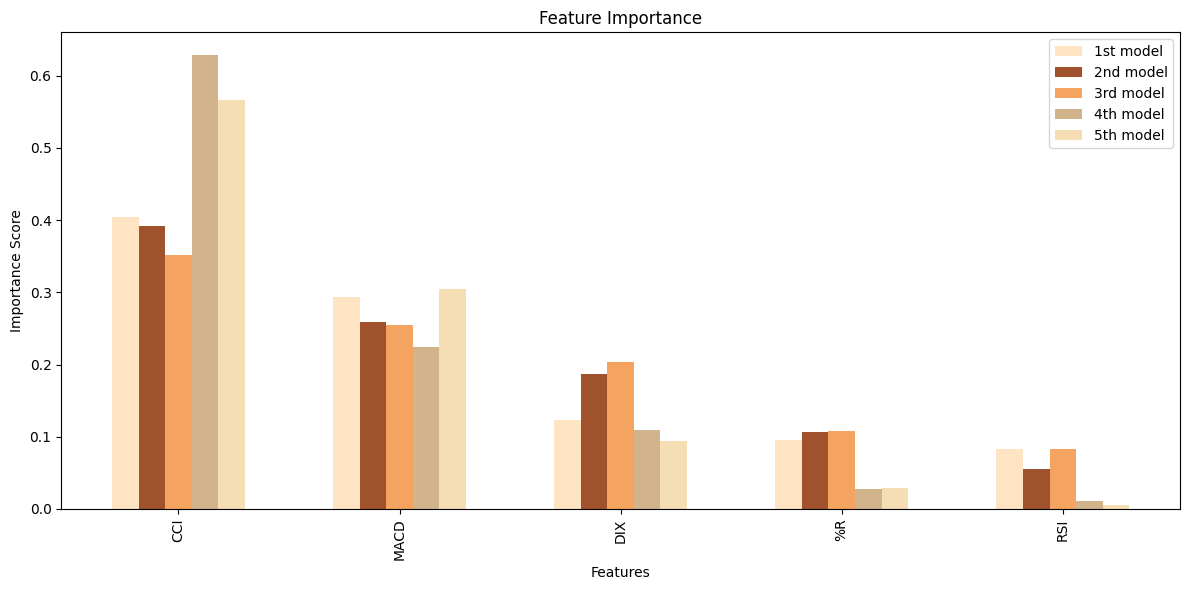

In [ ]:
model_names = ['1st model', '2nd model', '3rd model', '4th model', '5th model']

feature_importances = []
for model in models:
    importance = model.feature_importances_
    feature_importances.append(importance)

num_features = len(x_train.columns)
bar_width = 0.12
index = np.arange(num_features)
colors = ['bisque', 'sienna', 'sandybrown', 'tan', 'wheat']  # Lighter shades of blue, green, and red

# Plotting the feature importance
plt.figure(figsize=(12, 6))

for i, feature_importance in enumerate(feature_importances):
    sorted_indices = feature_importance.argsort()[::-1]
    sorted_importance = feature_importance[sorted_indices]
    sorted_features = x_train.columns[sorted_indices]

    plt.bar(index + i * bar_width, sorted_importance, bar_width, align='center', color=colors[i], label=model_names[i])

plt.xticks(index+bar_width*2, sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.legend()
plt.tight_layout()
plt.show()


# ROLLING CROSS-VALIDATION

In [ ]:
folds = 5

In [ ]:
tscv = TimeSeriesSplit(n_splits=folds)
models_ts = []
score_ts = []
train_ts = []

In [ ]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(len(X_train))

    value_counts_train = pd.Series(y_train).value_counts()

    # Get proportion of 1s and -1s in training set
    proportion_1_train = value_counts_train.get(1, 0) / len(y_train)
    proportion_minus_1_train = value_counts_train.get(-1, 0) / len(y_train)

    print("Proportion of 1s of Target_30_smooth in training set:", proportion_1_train)
    print("Proportion of -1s of Target_30_smooth in training set:", proportion_minus_1_train)

    value_counts_test = pd.Series(y_test).value_counts()

    # Get proportion of 1s and -1s in testing set
    proportion_1_test = value_counts_test.get(1, 0) / len(y_test)
    proportion_minus_1_test = value_counts_test.get(-1, 0) / len(y_test)

    print("Proportion of 1s of Target_30_smooth in testing set:", proportion_1_test)
    print("Proportion of -1s of Target_30_smooth in testing set:", proportion_minus_1_test)


    grid_rf = {
    'n_estimators': [75, 100, 150, 200],
    'max_depth': [2, 5, 7, 9, None],
    'max_features': [2, 3, 4]
    }

    cv = KFold(n_splits=4, shuffle=False)
    gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
    gscv_fit = gscv.fit(X_train, y_train)
    best_parameters = gscv_fit.best_params_
    print("Hyperparameter: ", best_parameters)

    model = RandomForestClassifier(**best_parameters, random_state = 42)
    model.fit(X_train, y_train)

    models.append(model)

    training_error = 1 - accuracy_score(y_train, model.predict(X_train))
    print("Training error:", training_error)

    models_ts.append(model)

    training_error = 1 - accuracy_score(y_train, model.predict(X_train))
    train_ts.append(training_error)
    print("Training error:", training_error)

    y_pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    score_ts.append(score)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("TARGET 30 DAYS")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)


276
Proportion of 1s of Target_30_smooth in training set: 0.5797101449275363
Proportion of -1s of Target_30_smooth in training set: 0.42028985507246375
Proportion of 1s of Target_30_smooth in testing set: 0.45787545787545786
Proportion of -1s of Target_30_smooth in testing set: 0.5421245421245421
Hyperparameter:  {'max_depth': 2, 'max_features': 4, 'n_estimators': 150}
Training error: 0.08333333333333337
Training error: 0.08333333333333337
TARGET 30 DAYS
Accuracy: 0.5970695970695971
Precision: 0.6017806884607058
Recall: 0.6016486486486486
F1 Score: 0.5970641906397595
Confusion Matrix:
[[81 67]
 [43 82]]
549
Proportion of 1s of Target_30_smooth in training set: 0.5191256830601093
Proportion of -1s of Target_30_smooth in training set: 0.4808743169398907
Proportion of 1s of Target_30_smooth in testing set: 0.9194139194139194
Proportion of -1s of Target_30_smooth in testing set: 0.08058608058608059
Hyperparameter:  {'max_depth': 2, 'max_features': 2, 'n_estimators': 100}
Training error: 0.

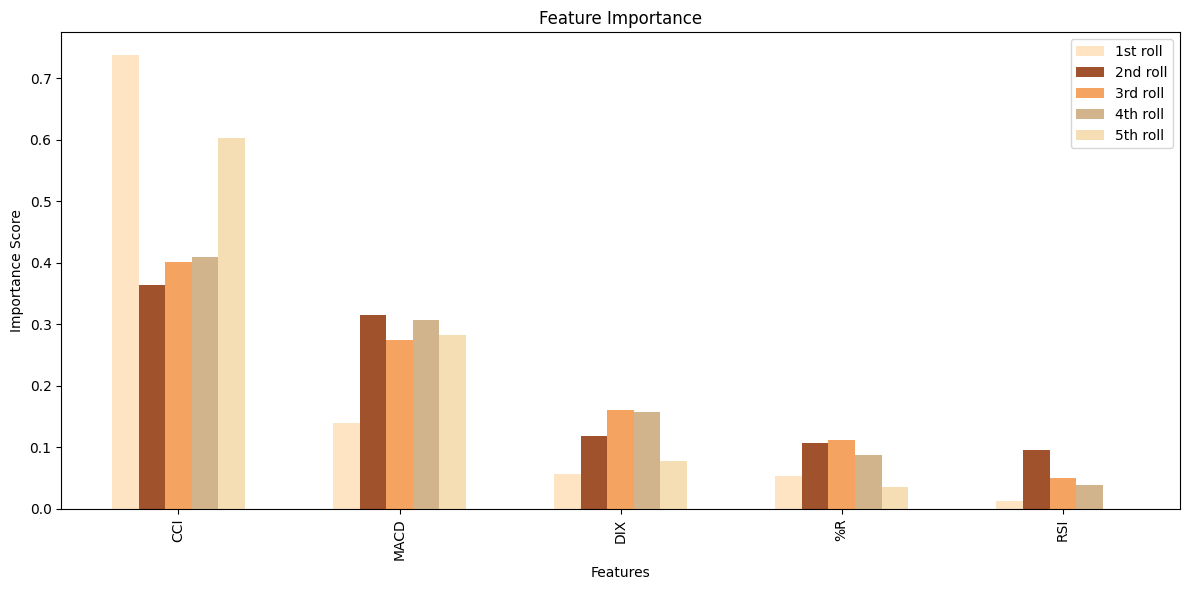

In [ ]:
model_names = ['1st roll', '2nd roll', '3rd roll', '4th roll', '5th roll']

feature_importances = []
for model in models_ts:
    importance = model.feature_importances_
    feature_importances.append(importance)

num_features = len(x_train.columns)
bar_width = 0.12
index = np.arange(num_features)
colors = ['bisque', 'sienna', 'sandybrown', 'tan', 'wheat']  # Lighter shades of blue, green, and red

# Plotting the feature importance
plt.figure(figsize=(12, 6))

for i, feature_importance in enumerate(feature_importances):
    sorted_indices = feature_importance.argsort()[::-1]
    sorted_importance = feature_importance[sorted_indices]
    sorted_features = x_train.columns[sorted_indices]

    plt.bar(index + i * bar_width, sorted_importance, bar_width, align='center', color=colors[i], label=model_names[i])

plt.xticks(index+bar_width*2, sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.legend()
plt.tight_layout()
plt.show()
